<a href="https://colab.research.google.com/github/bryleen1/DfE_python/blob/main/Choosing_the_right_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Define the problem domain

In [ ]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


The diabetes.csv dataset contains 9 columns, with 768 rows, which are: Pregnacies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and Outcome . All the columns contain continous values except for the Outcome column which has discrete values. The purpose of this machine learning model is to predict a patient's BMI.

The machine learning model aims to fit the equation y = w1 * Pregancies + w2 * Glucose + w3 * BloodPressure + w4 * SkinThickness + w5 * Insulin + w6 * BMI + w7 * DiabtesPedigreeFunction + w8 * Age + w9 * Outcome + bias. 

### Q. Identify candidate questions for your machine learning project

Problem statement: Given the parameters of a patient's records, what is the patient's predicted BMI?

### Q. Dataset registration on Azure

In [ ]:
# register dataset in azure
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
!pip install azureml-core
!pip install azureml-dataset-runtime 
from azureml.core import Workspace, Dataset

subscription_id = 'f6b7bbb7-706a-4f0d-8727-56ac48cdafa0'
resource_group = 'ML_project'
workspace_name = 'Dfe_project'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='diabetes dataset')
dataset.to_pandas_dataframe()
data1 = dataset.to_pandas_dataframe()
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
for col_name in data1.columns:
  unique_values = data1[col_name].value_counts()
  unique_values_counted = unique_values.count()
  print(col_name + ' : ' + str(unique_values_counted) )  #results show that discrete values are only on the Outcome column

Pregnancies : 17
Glucose : 136
BloodPressure : 47
SkinThickness : 51
Insulin : 186
BMI : 248
DiabetesPedigreeFunction : 517
Age : 52
Outcome : 2


In [ ]:
correlations = data1.corr()
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


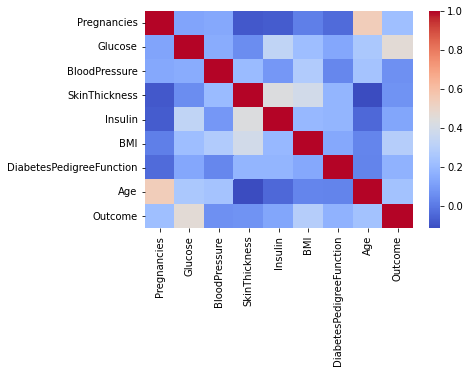

In [ ]:
#correlation visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(correlations, cmap='coolwarm')
plt.show()

# Part 2: Data Preparation

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no null values in my data, however, if there had been, the plan was to replace null values with the mean.

# Part 3: Model Selection

As the target column (BMI) contains continuous data, the machine learning model used is regression. 

# Part 4: Model Evaluation

Regression metrics

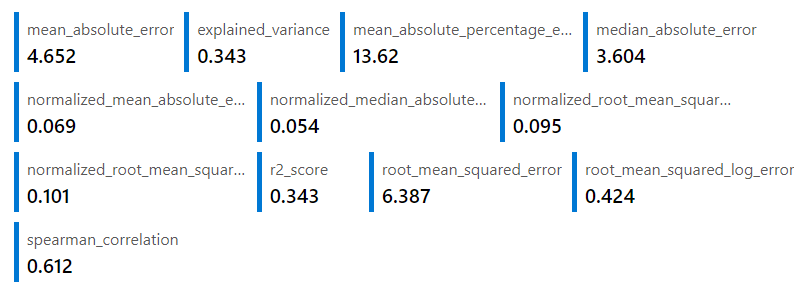

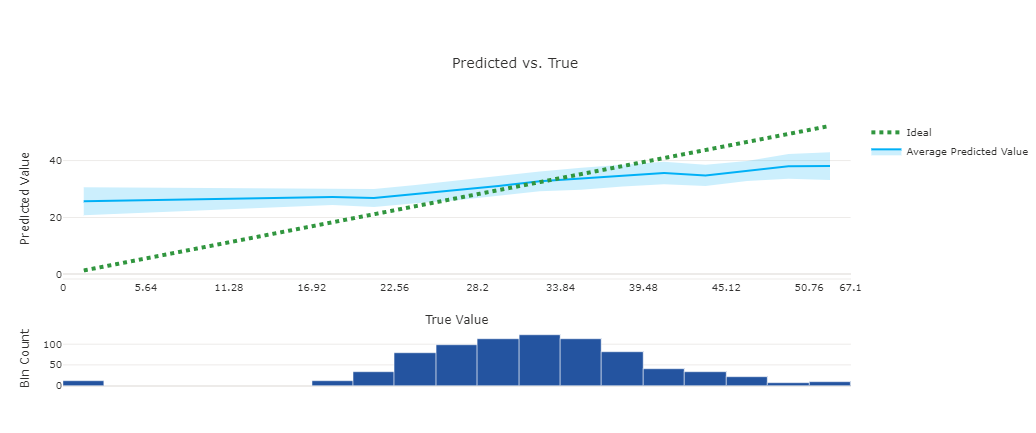

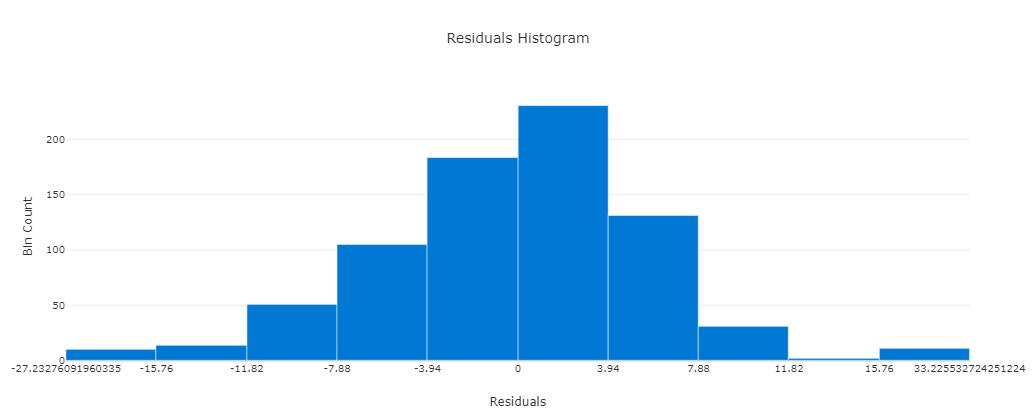

# Part 5: Stretch - Model Deployment

Consumption code (Python).

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "data":
    [
        {
            'Pregnancies': "0",
            'Glucose': "0",
            'BloodPressure': "0",
            'SkinThickness': "0",
            'Insulin': "0",
            'DiabetesPedigreeFunction': "0",
            'Age': "0",
            'Outcome': "0",
        },
    ],
}

body = str.encode(json.dumps(data))

url = 'http://e4b58f9b-a6b2-4f03-b629-2f101b41122f.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))